In [1]:
import numpy as np
from nptyping import NDArray
import random
import numpy.linalg as LA
import matplotlib.pyplot as plt
from typing import List, Set, Dict, Tuple, Optional, Any, Callable
from PIL import Image


In [2]:
from utils import load_image_to_arr, display_rgb, SVD2D
import dim_reduction
from spectral_data import ImageSpectralData
dim_reduction.init_basis_cache()
import cityscapes_helper
from dataset_creation import MultiScaleImageSampler, ImageChunkSummarizerOptions, MultiScaleImageEncoder, MultiScaleImageDecoder

In [3]:
cityscapes_helper.set_visual_data_zip_path(r"C:\Users\Ben\Downloads\leftImg8bit_trainvaltest.zip")
cityscapes_helper.set_semantic_data_zip_path(r"C:\Users\Ben\Downloads\gtFine_trainvaltest.zip")
cityscapes_helper.initialize_tool()

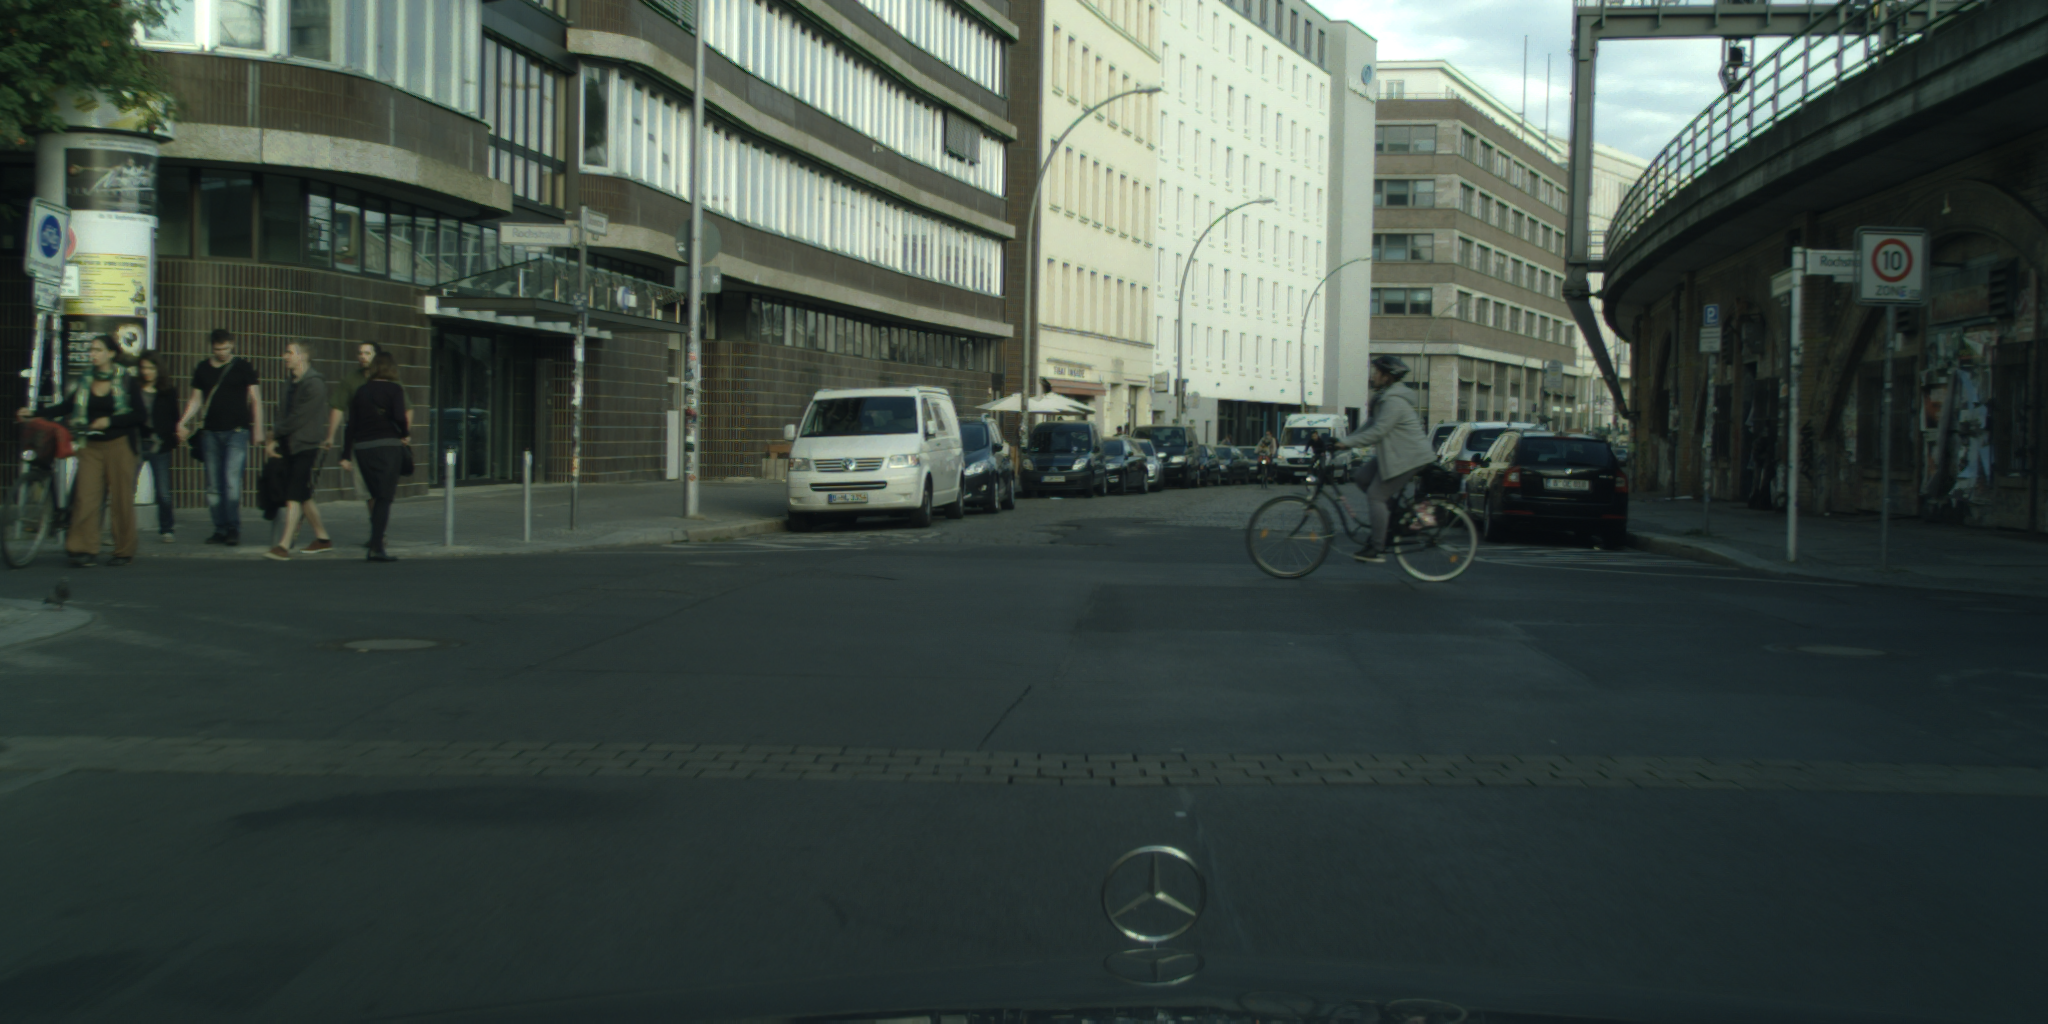

In [4]:
sceneID, img = cityscapes_helper.loadRandomVisualInfo()
Image.fromarray(img)

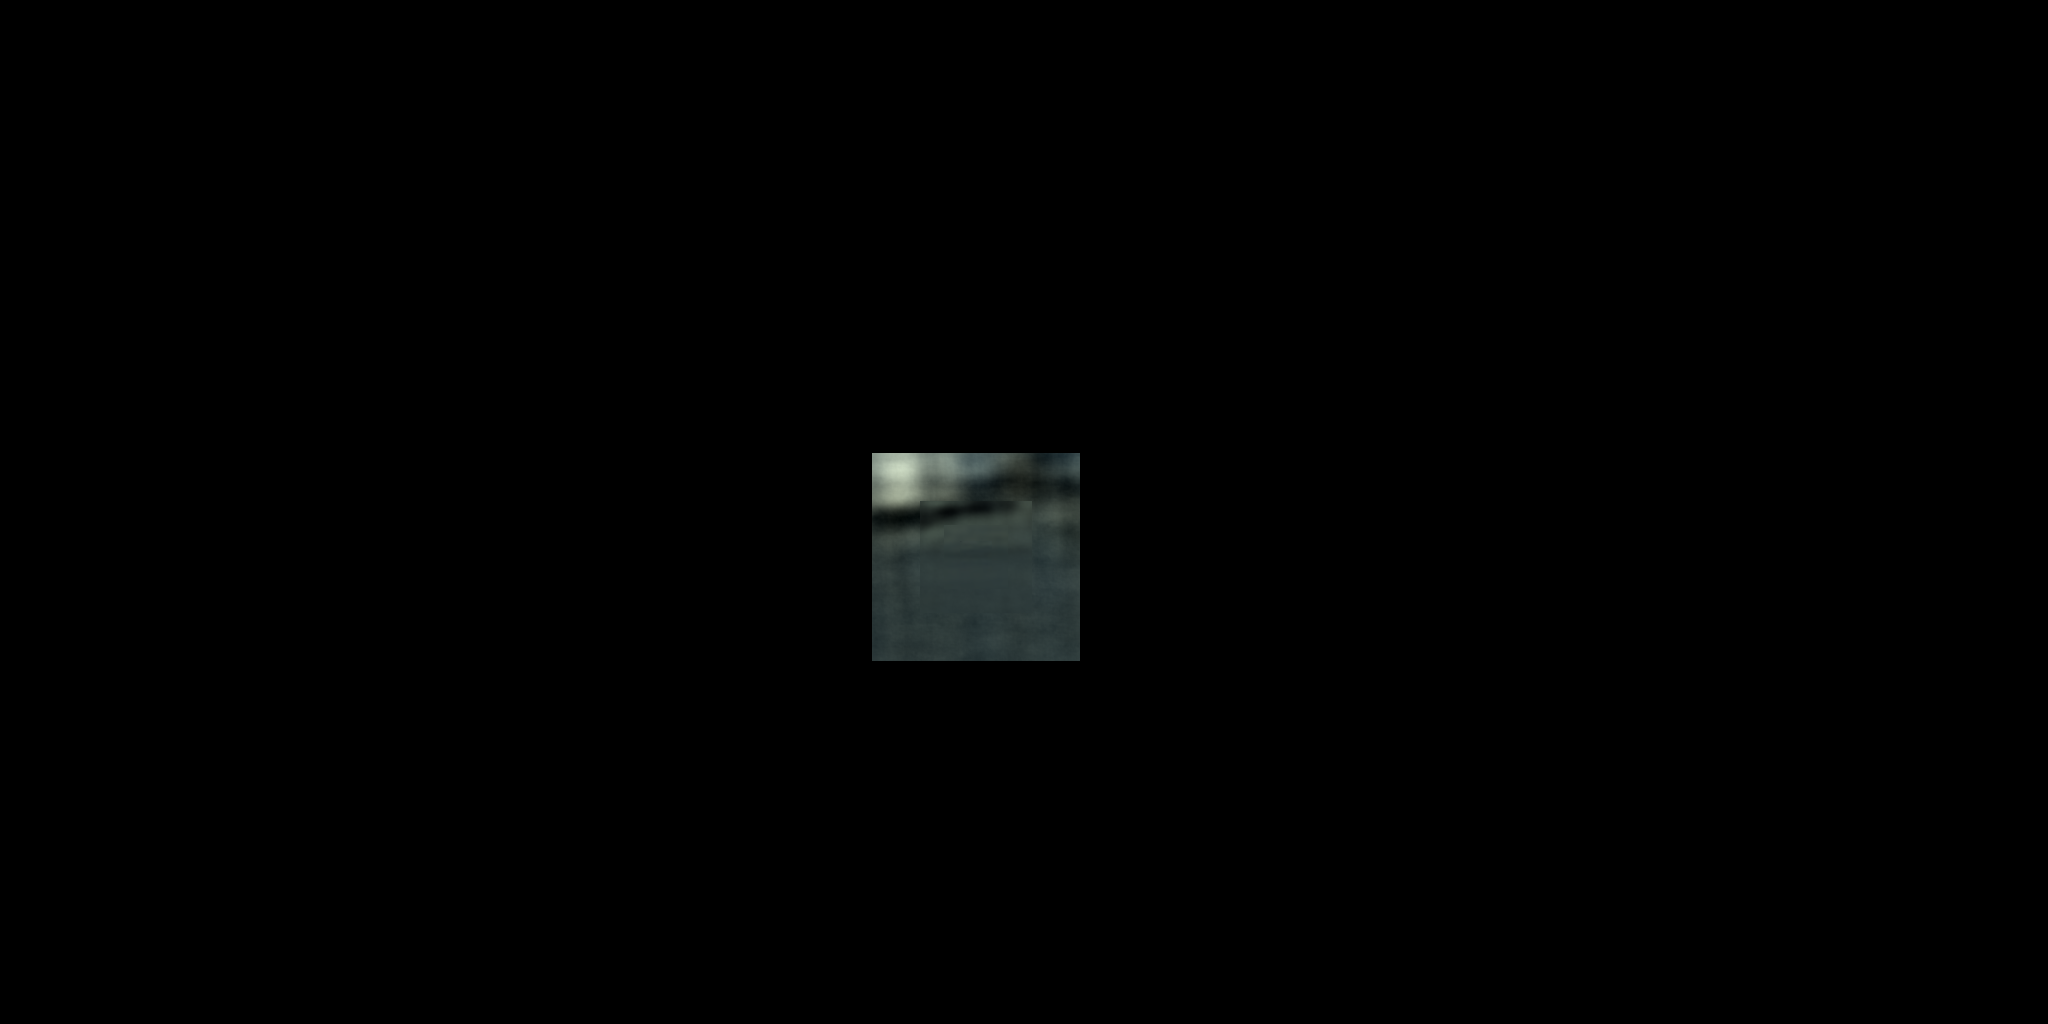

In [6]:

sampler = MultiScaleImageSampler([208, 112, 64, 32])
scales = sampler.sample(img)
chunk_summarizer_options = [ImageChunkSummarizerOptions(), ImageChunkSummarizerOptions(), ImageChunkSummarizerOptions(), ImageChunkSummarizerOptions()]
multi_chunk_encoder = MultiScaleImageEncoder(chunk_summarizer_options)
S = multi_chunk_encoder.encode([
    [scales[0]],
    [scales[1]],
    [scales[2]],
    [scales[3]]
])
#print(S[0])
scale_msk = multi_chunk_encoder.scale_masks
feature_masks = [enc.feature_masks for enc in multi_chunk_encoder.encoders]
multi_chunk_decoder = MultiScaleImageDecoder(scale_msk, feature_masks)
II = multi_chunk_decoder.decode(S[0])
im = Image.fromarray(II)
im

{'size1D': array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, Fal

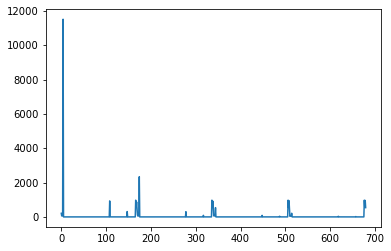

In [23]:
fig, ax = plt.subplots()
ax.plot(S[0])
feature_masks[0]

In [18]:
BV = dim_reduction.get_basis(32).basis_vectors
def show_basis(basis_vectors, offset):
    fig, axes = plt.subplots(1, 8, figsize=(12, 3))
    for i in range(8):
        axes[i].imshow(basis_vectors[offset + i].reshape((32, 32)))

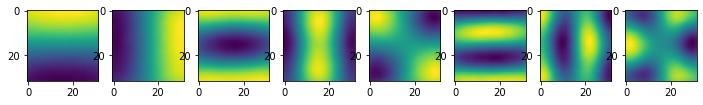

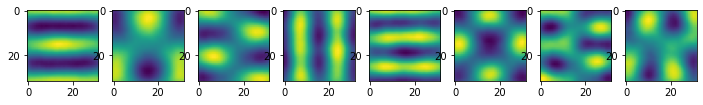

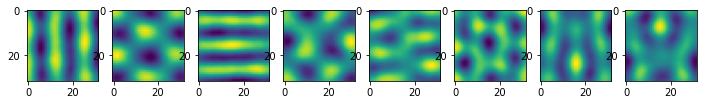

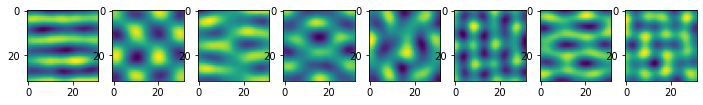

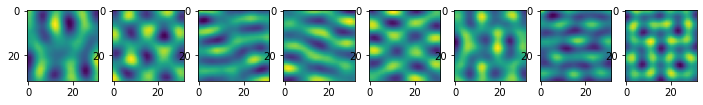

In [20]:
show_basis(BV, 0)
show_basis(BV, 8)
show_basis(BV, 16)
show_basis(BV, 24)
show_basis(BV, 32)

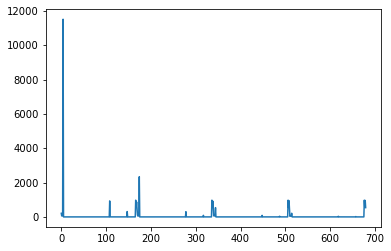

In [22]:
fig, ax = plt.subplots()
ax.plot(S[0])